# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [3]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet(r"/madhu/yellow_tripdata_2023-01.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r"/madhu")

# Create a list of all the twelve files to read
file_list = os.listdir(r"/madhu")

# initialise an empty dataframe
sampled_df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(),file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)

        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

        df['date'] =df['tpep_pickup_datetime'].dt.date
        df['hour'] =df['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df['date'].unique():
            date_data = df[df['date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]

                # Sample 1% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.0075, random_state=42)

                # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        sampled_df = pd.concat([sampled_df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [5]:
# Store the df in csv/parquet
# df.to_parquet('')
sampled_df.to_parquet("sampled_df.paraquet", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [6]:
# Load the new data file
df = pd.read_parquet("sampled_df.paraquet")

In [7]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-01 00:36:30   2023-04-01 01:00:19              1.0   
1         2  2023-04-01 00:03:07   2023-04-01 00:32:39              2.0   
2         1  2023-04-01 00:38:38   2023-04-01 00:54:02              1.0   
3         2  2023-04-01 00:26:44   2023-04-01 00:33:49              1.0   
4         2  2023-04-01 00:32:47   2023-04-01 00:53:16              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           5.21         1.0                  N           137           260   
1           4.86         1.0                  N           170           226   
2           1.70         1.0                  N           114           148   
3           1.61         1.0                  N            48           239   
4           6.64         1.0                  N            88           161   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        6.50           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        3.00           0.0   
3             1  ...      0.5        3.58           0.0   
4             1  ...      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         39.00                   2.5          0.0   
1                    1.0         31.80                   2.5          0.0   
2                    1.0         21.50                   2.5          0.0   
3                    1.0         17.88                   2.5          0.0   
4                    1.0         39.00                   2.5          0.0   

         date  hour airport_fee  
0  2023-04-01     0         NaN  
1  2023-04-01     0         NaN  
2  2023-04-01     0         NaN  
3  2023-04-01     0         NaN  
4  2023-04-01     0         NaN  

[5 rows x 22 columns]

In [18]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252364 entries, 0 to 287407
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               252364 non-null  int64         
 1   tpep_pickup_datetime   252364 non-null  datetime64[us]
 2   tpep_dropoff_datetime  252364 non-null  datetime64[us]
 3   passenger_count        252364 non-null  float64       
 4   trip_distance          252364 non-null  float64       
 5   RatecodeID             252364 non-null  float64       
 6   store_and_fwd_flag     252364 non-null  object        
 7   PULocationID           252364 non-null  int64         
 8   DOLocationID           252364 non-null  int64         
 9   payment_type           252364 non-null  int64         
 10  fare_amount            252364 non-null  float64       
 11  extra                  252364 non-null  float64       
 12  mta_tax                252364 non-null  float64  

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [19]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
columns_to_drop = ['store_and_fwd_flag', 'mta_tax', 'tolls_amount', 'extra']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-01 00:36:30   2023-04-01 01:00:19              1.0   
1         2  2023-04-01 00:03:07   2023-04-01 00:32:39              2.0   
2         1  2023-04-01 00:38:38   2023-04-01 00:54:02              1.0   
3         2  2023-04-01 00:26:44   2023-04-01 00:33:49              1.0   
4         2  2023-04-01 00:32:47   2023-04-01 00:53:16              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           5.21         1.0           137           260             1   
1           4.86         1.0           170           226             2   
2           1.70         1.0           114           148             1   
3           1.61         1.0            48           239             1   
4           6.64         1.0            88           161             1   

   fare_amount  tip_amount  improvement_surcharge  total_amount  \
0         27.5        6.50                    1.0         39.00   
1         26.8        0.00                    1.0         31.80   
2         13.5        3.00                    1.0         21.50   
3          9.3        3.58                    1.0         17.88   
4         31.0        3.00                    1.0         39.00   

   congestion_surcharge  Airport_fee        date  hour  airport_fee  
0                   2.5          0.0  2023-04-01     0          NaN  
1                   2.5          0.0  2023-04-01     0          NaN  
2                   2.5          0.0  2023-04-01     0          NaN  
3                   2.5          0.0  2023-04-01     0          NaN  
4                   2.5          0.0  2023-04-01     0          NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [20]:
# Combine the two airport fee columns

diffs = df[df['Airport_fee'] != df['airport_fee']]
print(f"Rows with different values: {len(diffs)}")
print("Null counts:")
print(df[['Airport_fee', 'airport_fee']].isnull().sum())
df['airport_fee_combined'] = df['Airport_fee'].combine_first(df['airport_fee'])
df.drop(columns=['Airport_fee', 'airport_fee'], inplace=True)
df.rename(columns={'airport_fee_combined': 'airport_fee'}, inplace=True)

Rows with different values: 252364
Null counts:
Airport_fee     20544
airport_fee    231820
dtype: int64


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [21]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]
print(f"Number of negative fare amounts: {len(negative_fares)}")
print(negative_fares.head())

Number of negative fare amounts: 1883
      VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
265          2  2023-04-01 12:54:47   2023-04-01 13:06:19              1.0   
392          2  2023-04-01 16:30:38   2023-04-01 16:43:28              1.0   
551          2  2023-04-01 19:04:41   2023-04-01 19:48:46              3.0   
1074         2  2023-04-02 13:06:29   2023-04-02 13:12:01              5.0   
1400         2  2023-04-02 21:06:17   2023-04-02 21:19:21              2.0   

      trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
265            1.58         1.0           236            74             4   
392            1.94         1.0           166            75             4   
551           16.92         2.0           132            68             2   
1074           0.80         1.0           239           142             3   
1400           2.52         1.0           237           161             4   

      fare_amount  tip_amount 

Did you notice something different in the `RatecodeID` column for above records?

In [22]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = df[df['fare_amount'] < 0]
ratecode_analysis = negative_fares['RatecodeID'].value_counts()
print(ratecode_analysis)

RatecodeID
1.0    1756
2.0      94
4.0      15
3.0      10
5.0       8
Name: count, dtype: int64


In [23]:
# Find which columns have negative values

numeric_df = df.select_dtypes(include=['float64', 'int64'])
negative_values = numeric_df[numeric_df < 0].count()
columns_with_negative_values = negative_values[negative_values > 0]

print("Columns with negative values:")
print(columns_with_negative_values)

Columns with negative values:
fare_amount              1883
tip_amount                  2
improvement_surcharge    1888
total_amount             1888
congestion_surcharge     1605
airport_fee               287
dtype: int64


In [24]:
# fix these negative values

negative_cols = ['fare_amount', 'tip_amount', 'improvement_surcharge',
                 'total_amount', 'congestion_surcharge', 'airport_fee']
for col in negative_cols:
    df.loc[df[col] < 0, col] = df[col].abs()
df.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-01 00:36:30   2023-04-01 01:00:19              1.0   
1         2  2023-04-01 00:03:07   2023-04-01 00:32:39              2.0   
2         1  2023-04-01 00:38:38   2023-04-01 00:54:02              1.0   
3         2  2023-04-01 00:26:44   2023-04-01 00:33:49              1.0   
4         2  2023-04-01 00:32:47   2023-04-01 00:53:16              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           5.21         1.0           137           260             1   
1           4.86         1.0           170           226             2   
2           1.70         1.0           114           148             1   
3           1.61         1.0            48           239             1   
4           6.64         1.0            88           161             1   

   fare_amount  tip_amount  improvement_surcharge  total_amount  \
0         27.5        6.50                    1.0         39.00   
1         26.8        0.00                    1.0         31.80   
2         13.5        3.00                    1.0         21.50   
3          9.3        3.58                    1.0         17.88   
4         31.0        3.00                    1.0         39.00   

   congestion_surcharge        date  hour  airport_fee  
0                   2.5  2023-04-01     0          0.0  
1                   2.5  2023-04-01     0          0.0  
2                   2.5  2023-04-01     0          0.0  
3                   2.5  2023-04-01     0          0.0  
4                   2.5  2023-04-01     0          0.0

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [25]:
# Find the proportion of missing values in each column

def render_bar_plot(x, y, title, xlabel, ylabel, figsize=(12, 6), show_data_labels=False):
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)

    if show_data_labels:
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', xytext=(0, 9), textcoords='offset points')

    plt.show()

missing_values = df.isna().mean() * 100
render_bar_plot(missing_values.index, missing_values.values, 'Proportion of Missing Values in Each Column', 'Columns', 'Proportion of Missing Values (%)', show_data_labels=True)


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [26]:
# Display the rows with null values

rows_with_nulls = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(rows_with_nulls)

# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())
print(f"Missing values in 'passenger_count' after imputation: {df['passenger_count'].isnull().sum()}")


Rows with missing values:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, tip_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, airport_fee]
Index: []
Missing values in 'passenger_count' after imputation: 0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [27]:
# Fix missing values in 'RatecodeID'

mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_ratecode, inplace=True)
missing_ratecode = df['RatecodeID'].isnull().sum()
print(f"Remaining missing values in 'RatecodeID': {missing_ratecode}")


Remaining missing values in 'RatecodeID': 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [28]:
# handle null values in congestion_surcharge

df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)
print(f"Remaining missing values in 'congestion_surcharge': {df['congestion_surcharge'].isnull().sum()}")



Remaining missing values in 'congestion_surcharge': 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [29]:
# Handle any remaining missing values
# Handle missing values in 'RatecodeID' by filling with the most frequent value (mode)
mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_ratecode, inplace=True)
df['congestion_surcharge'].fillna(0, inplace=True)
df['airport_fee'].fillna(0, inplace=True)
missing_values = df.isnull().sum()
print("Missing values after imputation:")
print(missing_values[missing_values > 0])  # Should show no missing values


Missing values after imputation:
Series([], dtype: int64)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

Descriptive Statistics:
            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  252364.000000                      252364                      252364   
mean        1.745415  2023-07-01 15:40:35.269868  2023-07-01 15:59:10.645199   
min         1.000000         2023-01-01 00:02:19         2023-01-01 00:15:59   
25%         1.000000  2023-04-01 19:43:32.250000  2023-04-01 20:03:28.750000   
50%         2.000000         2023-06-25 17:13:35         2023-06-25 17:37:04   
75%         2.000000  2023-10-05 15:36:28.500000  2023-10-05 15:55:56.250000   
max         2.000000         2023-12-31 23:54:57         2024-01-01 00:07:43   
std         0.435628                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    252364.000000  252364.000000  252364.000000  252364.000000   
mean          1.375941       3.746644       1.578850     164.506724   
min           0.000000       0.630000     

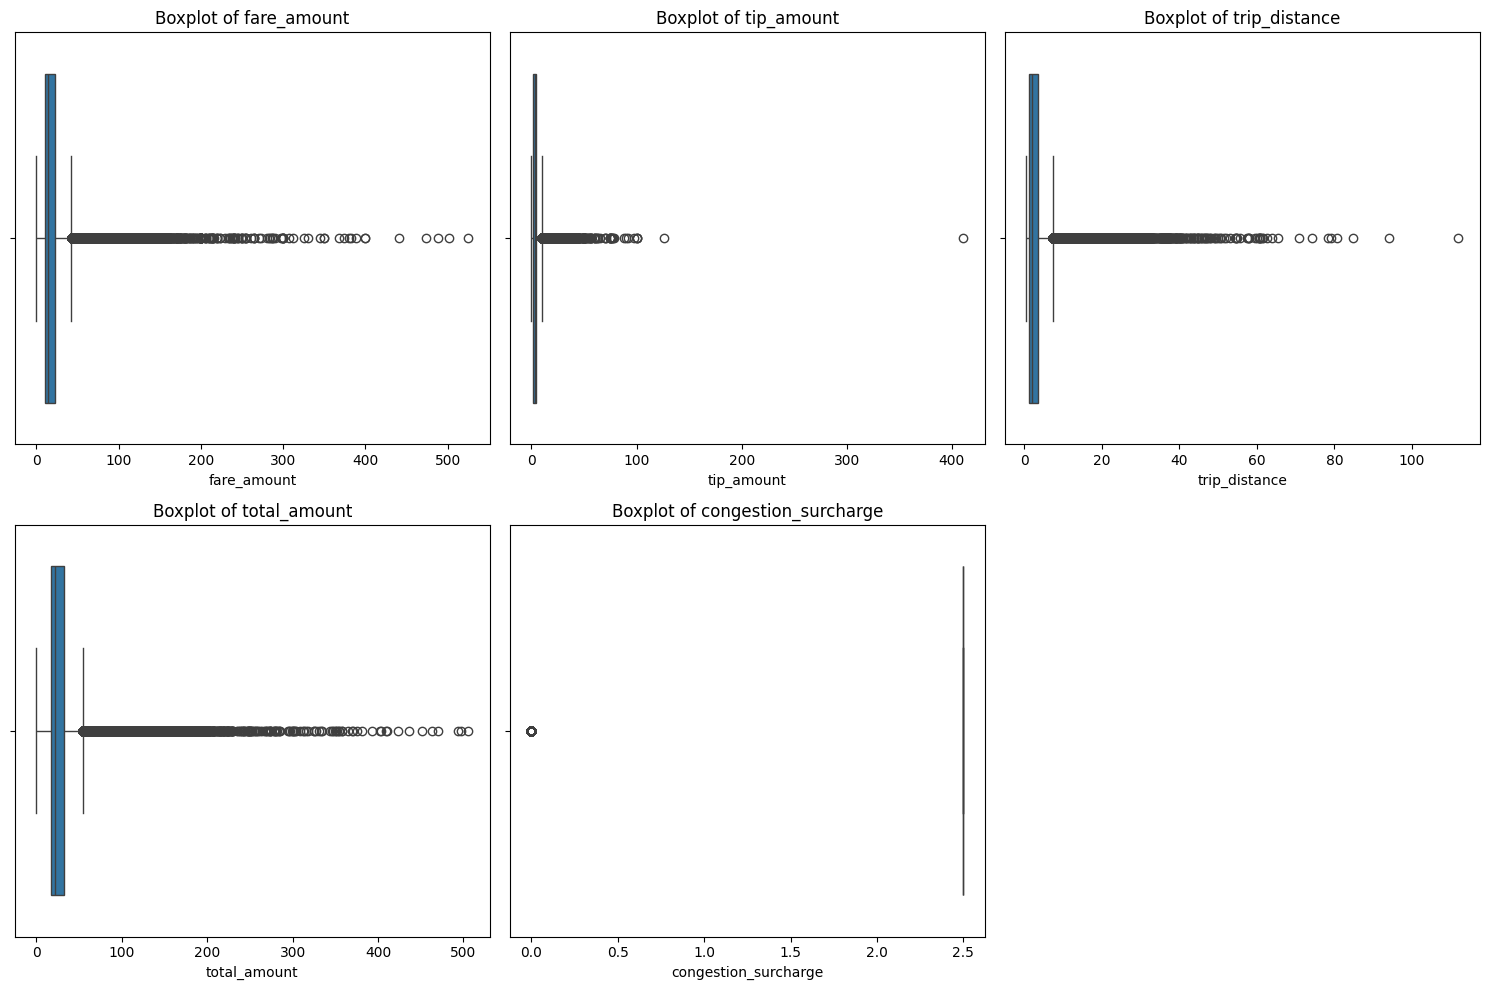


Rows with negative values in restricted columns:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, tip_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, airport_fee]
Index: []

Rows with invalid payment types:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, tip_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, airport_fee]
Index: []


In [30]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Descriptive statistics for numeric columns
desc_stats = df.describe()

# Describe the data and check for potential outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics for numeric columns
desc_stats = df.describe()
print("Descriptive Statistics:")
print(desc_stats)

# Define potential numeric columns to check
possible_numeric_columns = ['fare_amount', 'tip_amount', 'tolls_amount',
                            'trip_distance', 'total_amount', 'congestion_surcharge']

# Filter only columns that actually exist in df
numeric_columns = [col for col in possible_numeric_columns if col in df.columns]

# Boxplots for all existing numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Histograms for all existing numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Check for out-of-place values in known columns
# Only check for columns that exist
conditions = []
if 'trip_distance' in df.columns:
    conditions.append(df['trip_distance'] < 0)
if 'fare_amount' in df.columns:
    conditions.append(df['fare_amount'] < 0)
if 'tip_amount' in df.columns:
    conditions.append(df['tip_amount'] < 0)
if 'tolls_amount' in df.columns:
    conditions.append(df['tolls_amount'] < 0)

# Combine conditions for negative value check
if conditions:
    negative_values = df[conditions[0]]
    for cond in conditions[1:]:
        negative_values = pd.concat([negative_values, df[cond]])
else:
    negative_values = pd.DataFrame()

# Check for invalid payment types if column exists
if 'payment_type' in df.columns:
    invalid_payment_types = df[~df['payment_type'].isin([1, 2, 3, 4])]
else:
    invalid_payment_types = pd.DataFrame()

# Display results
print("\nRows with negative values in restricted columns:")
print(negative_values)

print("\nRows with invalid payment types:")
print(invalid_payment_types)



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

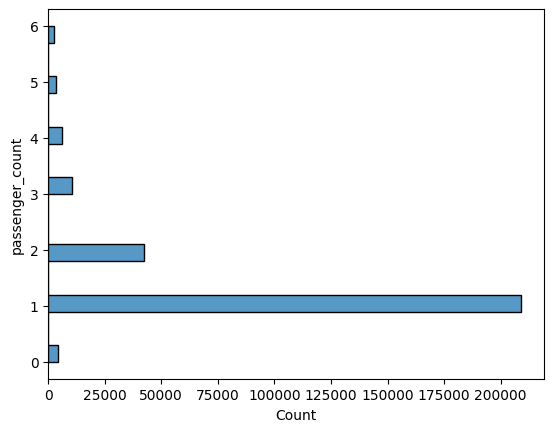

In [7]:
# remove passenger_count > 6

df = df[df['passenger_count'] <= 6]

# Remove rows where passenger_count is 0
df = df[df['passenger_count'] >= 0]

sns.histplot(y=df['passenger_count'], data=df)
plt.show()

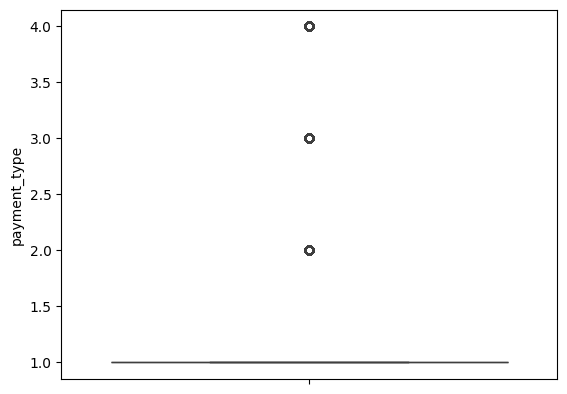

In [8]:
# Continue with outlier handling

df = df[df['payment_type'] != 0]
sns.boxplot(y=df['payment_type'], data=df)
plt.show()


In [9]:
outlier_years = df[(df['tpep_pickup_datetime'].dt.year != 2023) | (df['tpep_dropoff_datetime'].dt.year != 2023)]
outlier_years

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
191808         2  2023-12-31 23:52:48   2024-01-01 00:07:43              1.0   
191816         2  2023-12-31 23:54:57   2024-01-01 00:03:59              5.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
191808           9.16         1.0                  N           138   
191816           2.65         1.0                  N            79   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
191808           140             1  ...      0.5         7.0          6.94   
191816           256             1  ...      0.5         4.8          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
191808                    1.0         60.89                   2.5   
191816                    1.0         24.00                   2.5   

        Airport_fee        date  hour airport_fee  
191808         1.75  2023-12-31    23         NaN  
191816         0.00  2023-12-31    23         NaN  

[2 rows x 22 columns]

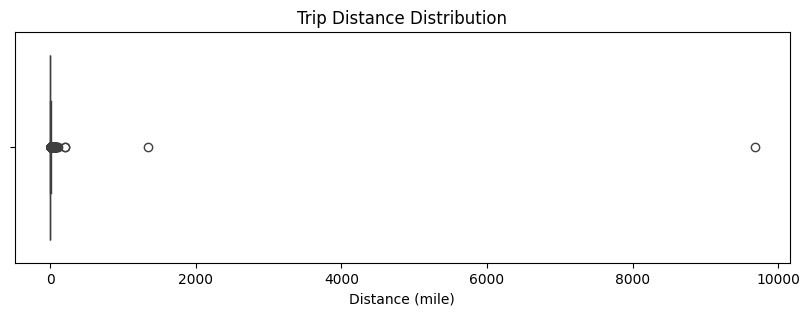

In [11]:
plt.figure(figsize=(10, 3))

sns.boxplot(data=df, x='trip_distance')
plt.xlabel('Distance (mile)')
plt.title('Trip Distance Distribution')

plt.show()

In [12]:
#***Assuming that taxis that travel less than (0.62 miles) are incorrect records such as the possibility of passengers or drivers canceling orders, then datasets that have this value will be dropped.
print('The amount of data that has a distance of less than 1 km (0.62 miles):', len(df[df['trip_distance'] < 0.62]))

The amount of data that has a distance of less than 1 km (0.62 miles): 24983


In [13]:
# Remove rows where trip_distance is less than 0.62 miles
df = df[df['trip_distance'] > 0.62]

In [14]:
print('The amount of data that has a distance of more than (120 miles):', len(df[df['trip_distance'] > 120]))

The amount of data that has a distance of more than (120 miles): 4


In [15]:
# Remove rows where trip_distance is more than 120 miles
df = df[df['trip_distance'] < 120]

In [16]:
# Remove rows where trip_distance is less than 0.62 miles
df = df[df['trip_distance'] > 0.62]

In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [31]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'tip_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'airport_fee']

In [35]:
# Define the list of variables
columns = [
    'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
    'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type',
    'fare_amount', 'tip_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'date', 'hour', 'airport_fee'
]
categorical_cols = [
    'VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'hour'
]
datetime_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'date']
numerical_cols = [col for col in columns if col not in categorical_cols + datetime_cols]
print("Categorical Variables:")
print(categorical_cols)

print("\nDatetime Variables:")
print(datetime_cols)

print("\nNumerical Variables:")
print(numerical_cols)

Categorical Variables:
['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'hour']

Datetime Variables:
['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'date']

Numerical Variables:
['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [38]:
# List of columns representing monetary values
monetary_columns = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee'
]
numerical_columns = monetary_columns
print("Numerical Columns:")
print(numerical_columns)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_columns)


Numerical Columns:
['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

Categorical Columns:
['date']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

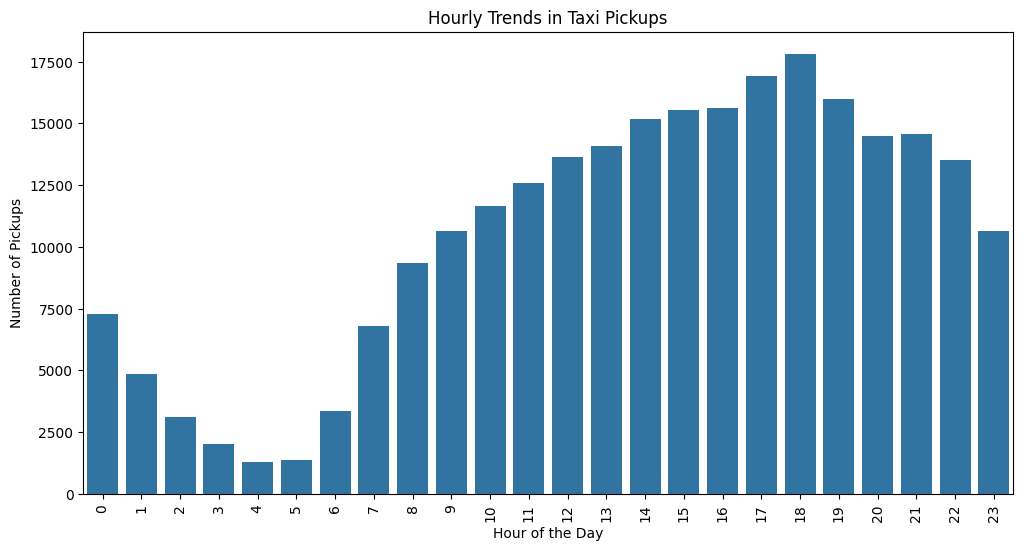

In [39]:
# Find and show the hourly trends in taxi pickups

df['pickup_time_derived'] = df['tpep_pickup_datetime'].dt.hour
hourly_pickups = df['pickup_time_derived'].value_counts().sort_index()
render_bar_plot(hourly_pickups.index, hourly_pickups.values, 'Hourly Trends in Taxi Pickups', 'Hour of the Day', 'Number of Pickups')


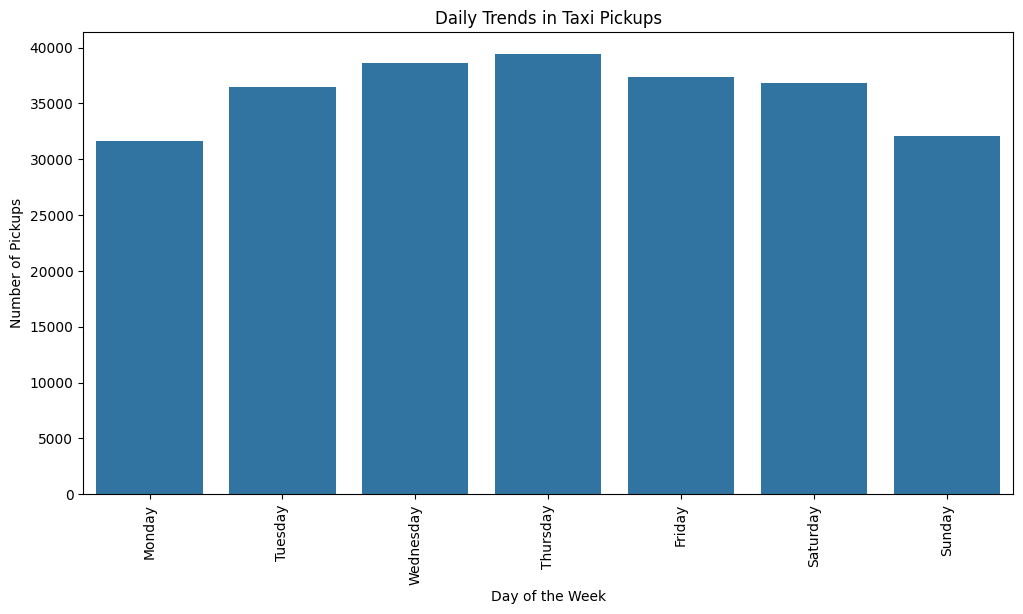

In [40]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day_derived'] = df['tpep_pickup_datetime'].dt.dayofweek
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_day_name_derived'] = df['pickup_day_derived'].map(day_name_map)
daily_pickups = df['pickup_day_name_derived'].value_counts().reindex(day_name_map.values())
render_bar_plot(daily_pickups.index, daily_pickups.values, 'Daily Trends in Taxi Pickups', 'Day of the Week', 'Number of Pickups')


In [41]:
# Show the monthly trends in pickups

def render_line_plot(x, y, title, xlabel, ylabel, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
df['pickup_month_derived'] = df['tpep_pickup_datetime'].dt.month
month_name_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['pickup_month_name_derived'] = df['pickup_month_derived'].map(month_name_map)
monthly_pickups = df['pickup_month_name_derived'].value_counts().reindex(month_name_map.values())
render_line_plot(monthly_pickups.index.astype(str), monthly_pickups.values, 'Monthly Trends in Taxi Pickups', 'Month', 'Number of Pickups')



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [42]:
# Analyse the above parameters

financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df[financial_columns].describe()


fare_amount     tip_amount   total_amount  trip_distance
count  252364.000000  252364.000000  252364.000000  252364.000000
mean       20.689970       3.721284      30.054088       3.746644
std        18.163622       4.156915      22.935557       4.661323
min         0.000000       0.000000       0.000000       0.630000
25%        10.000000       1.000000      16.800000       1.210000
50%        14.200000       3.000000      21.840000       1.940000
75%        23.000000       4.620000      31.920000       3.690000
max       525.200000     411.000000     505.950000     111.980000

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [43]:
# Create a df with non zero entries for the selected parameters.

non_zero_df = df[(df['fare_amount'] != 0) & (df['tip_amount'] != 0) & (df['total_amount'] != 0) & (df['trip_distance'] != 0)]
non_zero_df.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-01 00:36:30   2023-04-01 01:00:19              1.0   
2         1  2023-04-01 00:38:38   2023-04-01 00:54:02              1.0   
3         2  2023-04-01 00:26:44   2023-04-01 00:33:49              1.0   
4         2  2023-04-01 00:32:47   2023-04-01 00:53:16              2.0   
5         2  2023-04-01 00:35:14   2023-04-01 00:45:03              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           5.21         1.0           137           260             1   
2           1.70         1.0           114           148             1   
3           1.61         1.0            48           239             1   
4           6.64         1.0            88           161             1   
5           2.32         1.0           236           162             1   

   fare_amount  ...  total_amount  congestion_surcharge        date  hour  \
0         27.5  ...         39.00                   2.5  2023-04-01     0   
2         13.5  ...         21.50                   2.5  2023-04-01     0   
3          9.3  ...         17.88                   2.5  2023-04-01     0   
4         31.0  ...         39.00                   2.5  2023-04-01     0   
5         12.8  ...         21.36                   2.5  2023-04-01     0   

  airport_fee  pickup_time_derived  pickup_day_derived  \
0         0.0                    0                   5   
2         0.0                    0                   5   
3         0.0                    0                   5   
4         0.0                    0                   5   
5         0.0                    0                   5   

   pickup_day_name_derived  pickup_month_derived pickup_month_name_derived  
0                 Saturday                     4                     April  
2                 Saturday                     4                     April  
3                 Saturday                     4                     April  
4                 Saturday                     4                     April  
5                 Saturday                     4                     April  

[5 rows x 22 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [44]:
# Group data by month and analyse monthly revenue

monthly_revenue = df.groupby('pickup_month_name_derived')['total_amount'].sum().reindex(month_name_map.values())
render_line_plot(monthly_revenue.index, monthly_revenue.values, 'Monthly Revenue Trend', 'Month', 'Total Revenue')


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

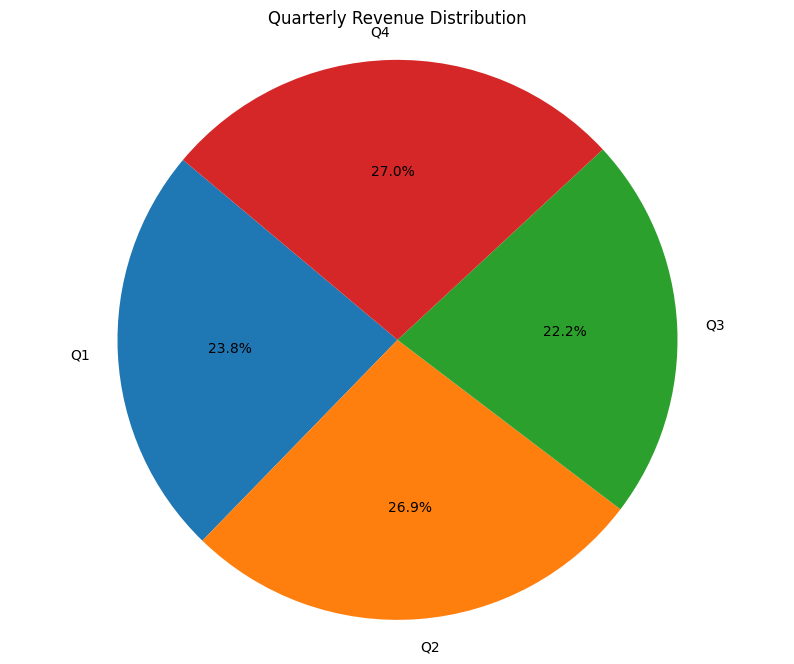

In [45]:
# Calculate proportion of each quarter

def month_to_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'
non_zero_df['pickup_quarter_derived'] = non_zero_df['pickup_month_derived'].apply(month_to_quarter)
quarterly_revenue = non_zero_df.groupby('pickup_quarter_derived')['total_amount'].sum()
plt.figure(figsize=(10, 8))
plt.pie(quarterly_revenue, labels=quarterly_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Quarterly Revenue Distribution')
plt.axis('equal')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

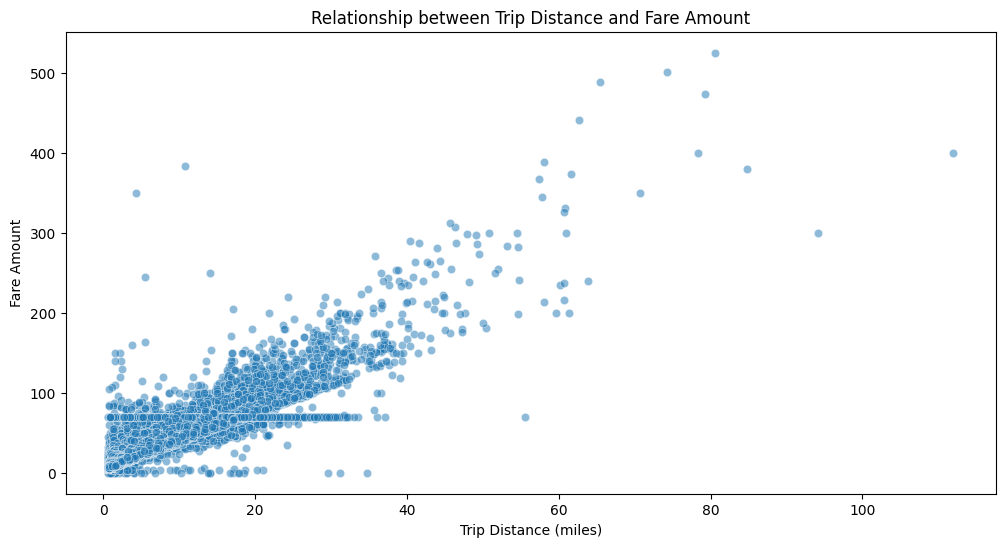

Correlation between Trip Distance and Fare Amount: 0.95


In [46]:
# Show how trip fare is affected by distance

def render_scatter_plot(x, y, data, title, xlabel, ylabel, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x, y=y, data=data, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
filtered_df = df[df['trip_distance'] > 0]
render_scatter_plot('trip_distance', 'fare_amount', filtered_df, 'Relationship between Trip Distance and Fare Amount', 'Trip Distance (miles)', 'Fare Amount')
correlation_value = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f'Correlation between Trip Distance and Fare Amount: {correlation_value:.2f}')




**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [48]:
# Show relationship between fare and trip duration

df['trip_duration_derived'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
render_scatter_plot('trip_duration_derived', 'fare_amount', df, 'Relationship between Trip Duration and Fare Amount', 'Trip Duration (minutes)', 'Fare Amount')
correlation_value_duration_fare = df['trip_duration_derived'].corr(df['fare_amount'])
print(f'Correlation between Trip Duration and Fare Amount: {correlation_value_duration_fare:.2f}')

Correlation between Trip Duration and Fare Amount: 0.26


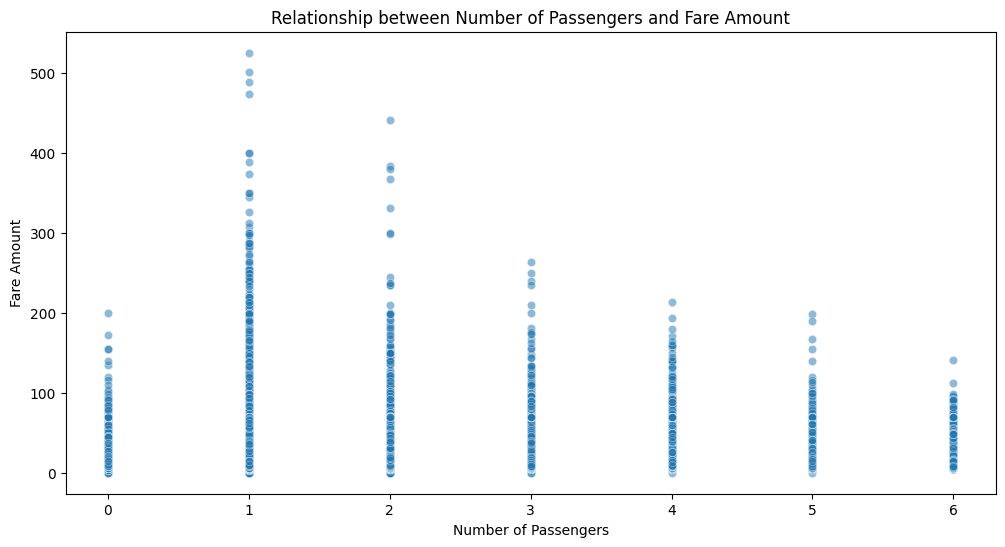

Correlation between Number of Passengers and Fare Amount: 0.04


In [49]:
# Show relationship between fare and number of passengers

render_scatter_plot('passenger_count', 'fare_amount', df, 'Relationship between Number of Passengers and Fare Amount', 'Number of Passengers', 'Fare Amount')
correlation_value_passenger_fare = df['passenger_count'].corr(df['fare_amount'])
print(f'Correlation between Number of Passengers and Fare Amount: {correlation_value_passenger_fare:.2f}')

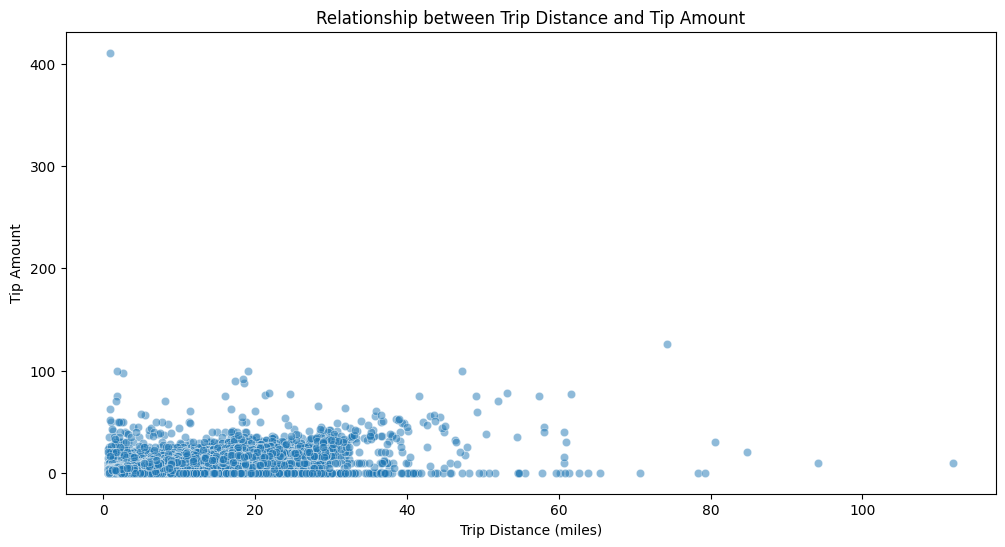

Correlation between Trip Distance and Tip Amount: 0.57


In [50]:
# Show relationship between tip and trip distance

render_scatter_plot('trip_distance', 'tip_amount', df, 'Relationship between Trip Distance and Tip Amount', 'Trip Distance (miles)', 'Tip Amount')
correlation_value_tip_distance = df['trip_distance'].corr(df['tip_amount'])
print(f'Correlation between Trip Distance and Tip Amount: {correlation_value_tip_distance:.2f}')



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

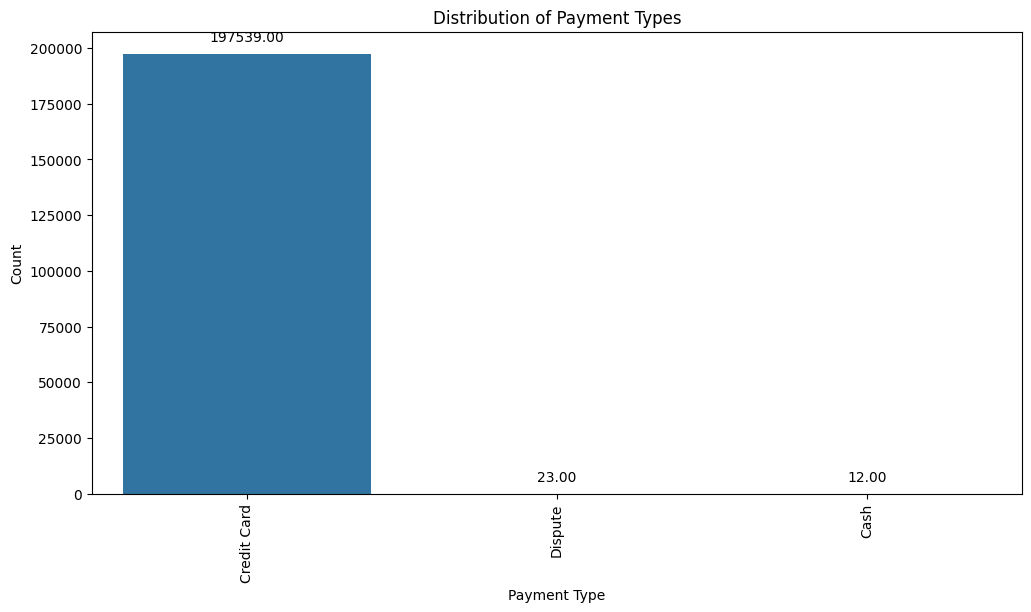

In [51]:
# Analyse the distribution of different payment types (payment_type).

payment_type_counts = non_zero_df['payment_type'].value_counts()
payment_type_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
payment_type_counts.index = payment_type_counts.index.map(payment_type_map)
render_bar_plot(payment_type_counts.index, payment_type_counts.values, 'Distribution of Payment Types', 'Payment Type', 'Count', show_data_labels=True)


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [52]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [53]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
file_path = r'/taxi_zones.shp'
zones = gpd.read_file(r'/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

from matplotlib import pyplot as plt
_df_0['OBJECTID'].plot(kind='hist', bins=20, title='OBJECTID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Shape_Leng'].plot(kind='hist', bins=20, title='Shape_Leng')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Shape_Area'].plot(kind='hist', bins=20, title='Shape_Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['LocationID'].plot(kind='hist', bins=20, title='LocationID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('zone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('borough').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='OBJECTID', y='Shape_Leng', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Shape_Leng', y='Shape_Area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Shape_Area', y='LocationID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OBJECTID']
  ys = series['Shape_Leng']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('OBJECTID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('zone')):
  _plot_series(series, series_name, i)
  fig.legend(title='zone', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OBJECTID')
_ = plt.ylabel('Shape_Leng')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OBJECTID']
  ys = series['Shape_Leng']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('OBJECTID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('borough')):
  _plot_series(series, series_name, i)
  fig.legend(title='borough', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OBJECTID')
_ = plt.ylabel('Shape_Leng')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OBJECTID']
  ys = series['Shape_Area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('OBJECTID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('zone')):
  _plot_series(series, series_name, i)
  fig.legend(title='zone', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OBJECTID')
_ = plt.ylabel('Shape_Area')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OBJECTID']
  ys = series['Shape_Area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('OBJECTID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('borough')):
  _plot_series(series, series_name, i)
  fig.legend(title='borough', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OBJECTID')
_ = plt.ylabel('Shape_Area')

from matplotlib import pyplot as plt
_df_13['OBJECTID'].plot(kind='line', figsize=(8, 4), title='OBJECTID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Shape_Leng'].plot(kind='line', figsize=(8, 4), title='Shape_Leng')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Shape_Area'].plot(kind='line', figsize=(8, 4), title='Shape_Area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['LocationID'].plot(kind='line', figsize=(8, 4), title='LocationID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['borough'].value_counts()
    for x_label, grp in _df_17.groupby('zone')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('zone')
_ = plt.ylabel('borough')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['zone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='OBJECTID', y='zone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['borough'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='OBJECTID', y='borough', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['zone'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Shape_Leng', y='zone', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['borough'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Shape_Leng', y='borough', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


<Axes: >

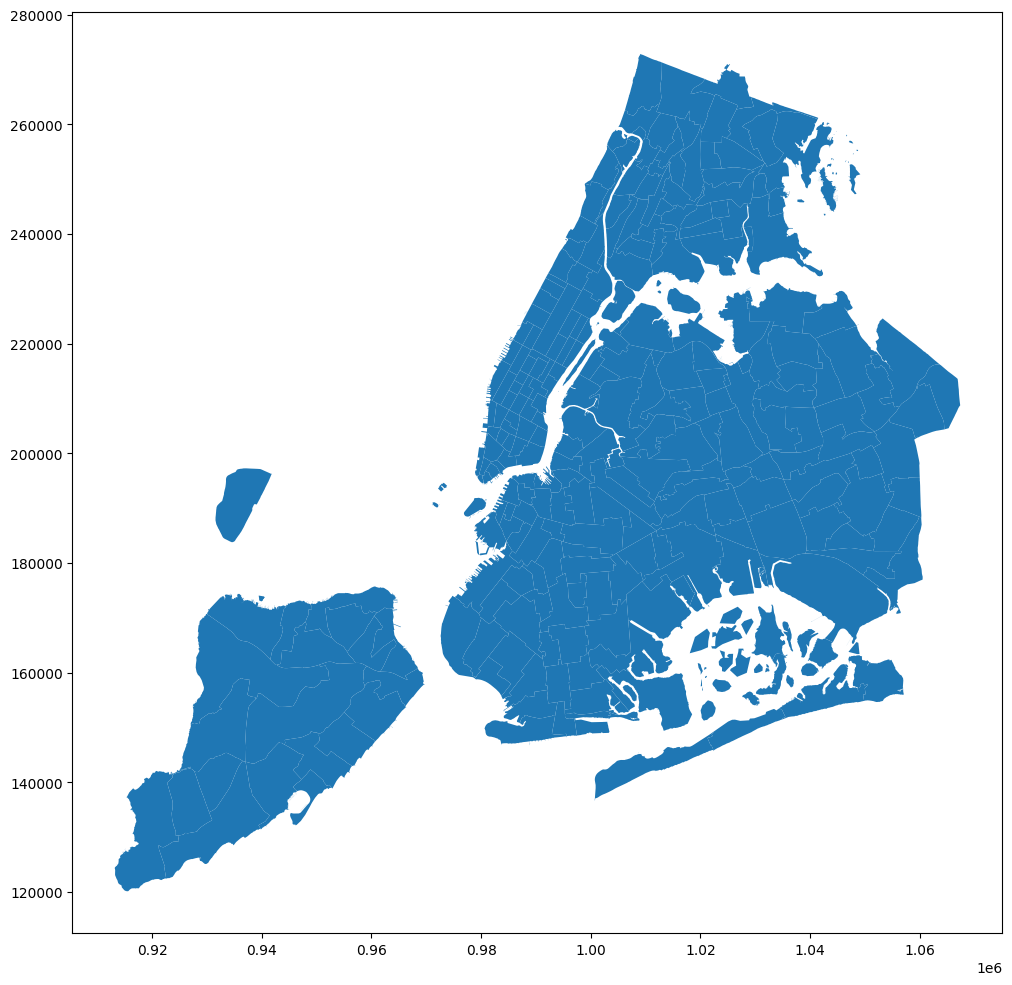

In [55]:
# print(zones.info())
# zones.plot()
zones.info()
zones.plot(figsize=(12, 12))

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [56]:
# Merge zones and trip records using locationID and PULocationID
merged_df = non_zero_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the first few rows of the merged DataFrame
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-01 00:36:30   2023-04-01 01:00:19              1.0   
1         1  2023-04-01 00:38:38   2023-04-01 00:54:02              1.0   
2         2  2023-04-01 00:26:44   2023-04-01 00:33:49              1.0   
3         2  2023-04-01 00:32:47   2023-04-01 00:53:16              2.0   
4         2  2023-04-01 00:35:14   2023-04-01 00:45:03              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           5.21         1.0           137           260             1   
1           1.70         1.0           114           148             1   
2           1.61         1.0            48           239             1   
3           6.64         1.0            88           161             1   
4           2.32         1.0           236           162             1   

   fare_amount  ...  pickup_month_derived  pickup_month_name_derived  \
0         27.5  ...                     4                      April   
1         13.5  ...                     4                      April   
2          9.3  ...                     4                      April   
3         31.0  ...                     4                      April   
4         12.8  ...                     4                      April   

   pickup_quarter_derived  OBJECTID Shape_Leng  Shape_Area  \
0                      Q2     137.0   0.046108    0.000116   
1                      Q2     114.0   0.031727    0.000047   
2                      Q2      48.0   0.043747    0.000094   
3                      Q2      88.0   0.035205    0.000057   
4                      Q2     236.0   0.044252    0.000103   

                       zone  LocationID    borough  \
0                  Kips Bay       137.0  Manhattan   
1   Greenwich Village South       114.0  Manhattan   
2              Clinton East        48.0  Manhattan   
3  Financial District South        88.0  Manhattan   
4     Upper East Side North       236.0  Manhattan   

                                            geometry  
0  POLYGON ((991954.728 209026.462, 991949.076 20...  
1  POLYGON ((986306.712 203122.786, 986300.242 20...  
2  POLYGON ((986694.313 214463.846, 986568.184 21...  
3  POLYGON ((981547.706 196045.255, 981628.588 19...  
4  POLYGON ((995940.048 221122.92, 995812.322 220...  

[5 rows x 30 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [57]:
# Group data by location and calculate the number of trips
trips_per_location = merged_df.groupby('PULocationID').size().reset_index(name='total_trips')
trips_per_location.head()


PULocationID  total_trips
0             1            6
1             4          198
2             7           37
3             8            1
4            10           58

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

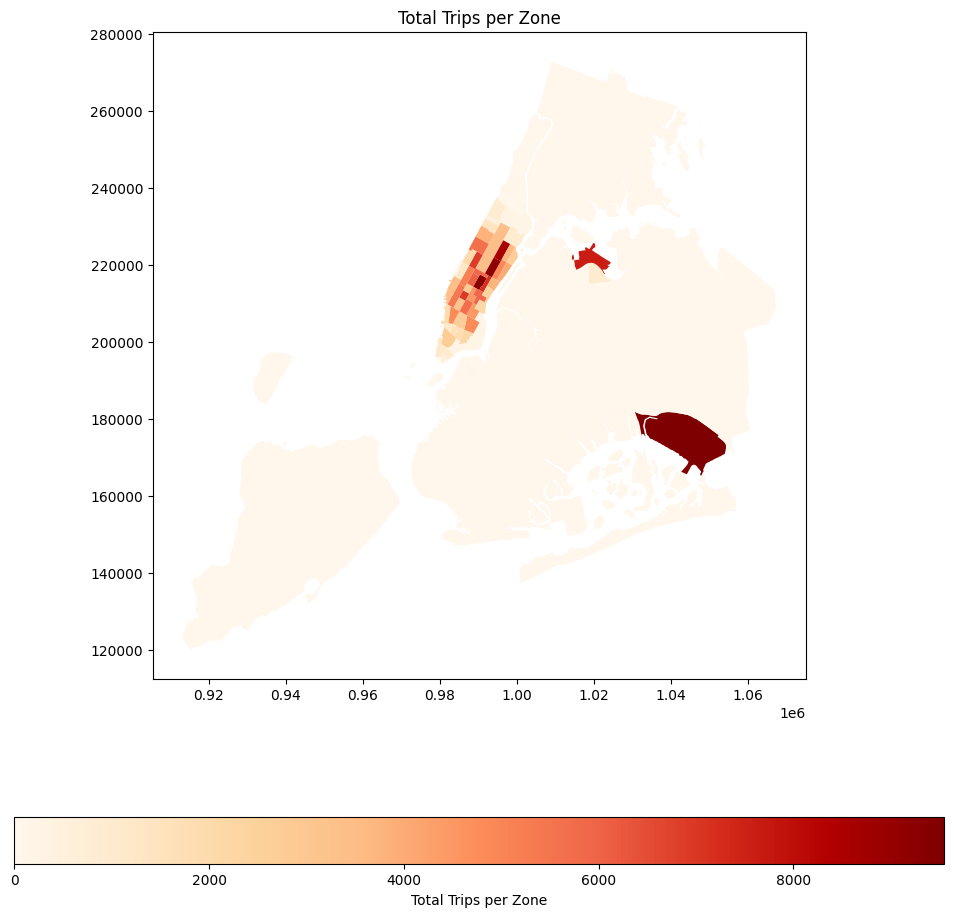

In [58]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips['total_trips'].fillna(0, inplace=True)
zones_with_trips.plot(column='total_trips', cmap='OrRd', legend=True, legend_kwds={'label': "Total Trips per Zone", 'orientation': "horizontal"}, figsize=(12, 12))
plt.title('Total Trips per Zone')
plt.show()


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [59]:
# Define figure and axis

zone_trip_counts = merged_df['PULocationID'].value_counts().reset_index()
zone_trip_counts.columns = ['LocationID', 'trip_count']
zones = zones.merge(zone_trip_counts, on='LocationID', how='left')
zones['trip_count'] = zones['trip_count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the map and display it
zones.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"}, cmap='OrRd')
plt.title('Zone-wise Number of Trips')
plt.show()

In [60]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by='trip_count', ascending=False)
zones_sorted[['zone', 'trip_count']]



zone  trip_count
131              JFK Airport      9550.0
160           Midtown Center      9262.0
236    Upper East Side South      9207.0
235    Upper East Side North      8617.0
137        LaGuardia Airport      7634.0
..                       ...         ...
240    Van Cortlandt Village         0.0
241     Van Nest/Morris Park         0.0
244            West Brighton         0.0
2    Allerton/Pelham Gardens         0.0
1                Jamaica Bay         0.0

[263 rows x 2 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

 Busiest Hour: 18:00 with 14361 trips


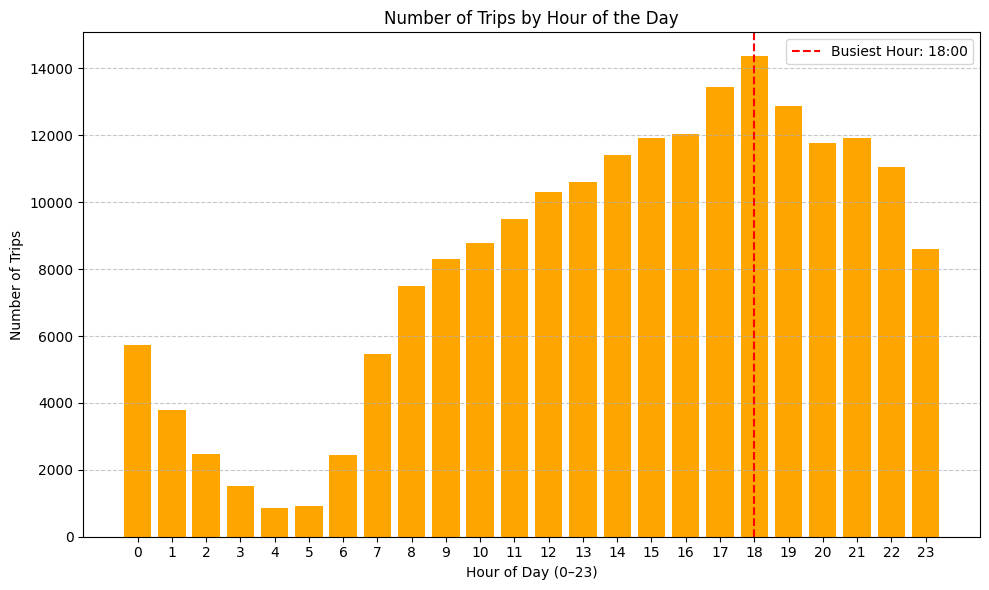

In [73]:
# Find routes which have the slowest speeds at different times of the day
import pandas as pd
import matplotlib.pyplot as plt
merged_df['tpep_pickup_datetime'] = pd.to_datetime(merged_df['tpep_pickup_datetime'])
merged_df['pickup_hour'] = merged_df['tpep_pickup_datetime'].dt.hour
hourly_trip_counts = merged_df['pickup_hour'].value_counts().sort_index()
busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_count = hourly_trip_counts.max()
print(f" Busiest Hour: {busiest_hour}:00 with {busiest_hour_count} trips")
# Plot
plt.figure(figsize=(10,6))
plt.bar(hourly_trip_counts.index, hourly_trip_counts.values, color='orange')
plt.axvline(busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour}:00')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [74]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trip_counts = merged_df['pickup_time_derived'].value_counts().sort_index()
render_bar_plot(hourly_trip_counts.index, hourly_trip_counts.values, 'Number of Trips at Each Hour of the Day', 'Hour of the Day', 'Number of Trips')
busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_trips = hourly_trip_counts.max()
print(f'The busiest hour is {busiest_hour}:00 with {busiest_hour_trips} trips.')

The busiest hour is 18:00 with 14361 trips.


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [75]:
busiest_hours = hourly_trip_counts.nlargest(5)
print("Actual number of trips in the five busiest hours:")
busiest_hours


Actual number of trips in the five busiest hours:


pickup_time_derived
18    14361
17    13450
19    12883
16    12039
21    11932
Name: count, dtype: int64

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [79]:
# Scale up the number of trips
scaled_trips_per_location = trips_per_location.copy()
scaled_trips_per_location['total_trips'] *= sampling_ratio
sample_fraction =0.1
scaled_trips_per_location.head()


PULocationID  total_trips
0             1           60
1             4         1980
2             7          370
3             8           10
4            10          580

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [81]:
# Compare traffic trends for the week days and weekends

weekdays_df = merged_df[merged_df['pickup_day_derived'] < 5]  # Monday to Friday
weekends_df = merged_df[merged_df['pickup_day_derived'] >= 5]  # Saturday and Sunday
weekday_hourly_pickups = weekdays_df['pickup_time_derived'].value_counts().sort_index()
weekend_hourly_pickups = weekends_df['pickup_time_derived'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekday_hourly_pickups.index, y=weekday_hourly_pickups.values, marker='o', label='Weekdays')
sns.lineplot(x=weekend_hourly_pickups.index, y=weekend_hourly_pickups.values, marker='o', label='Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xticks(range(24))
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

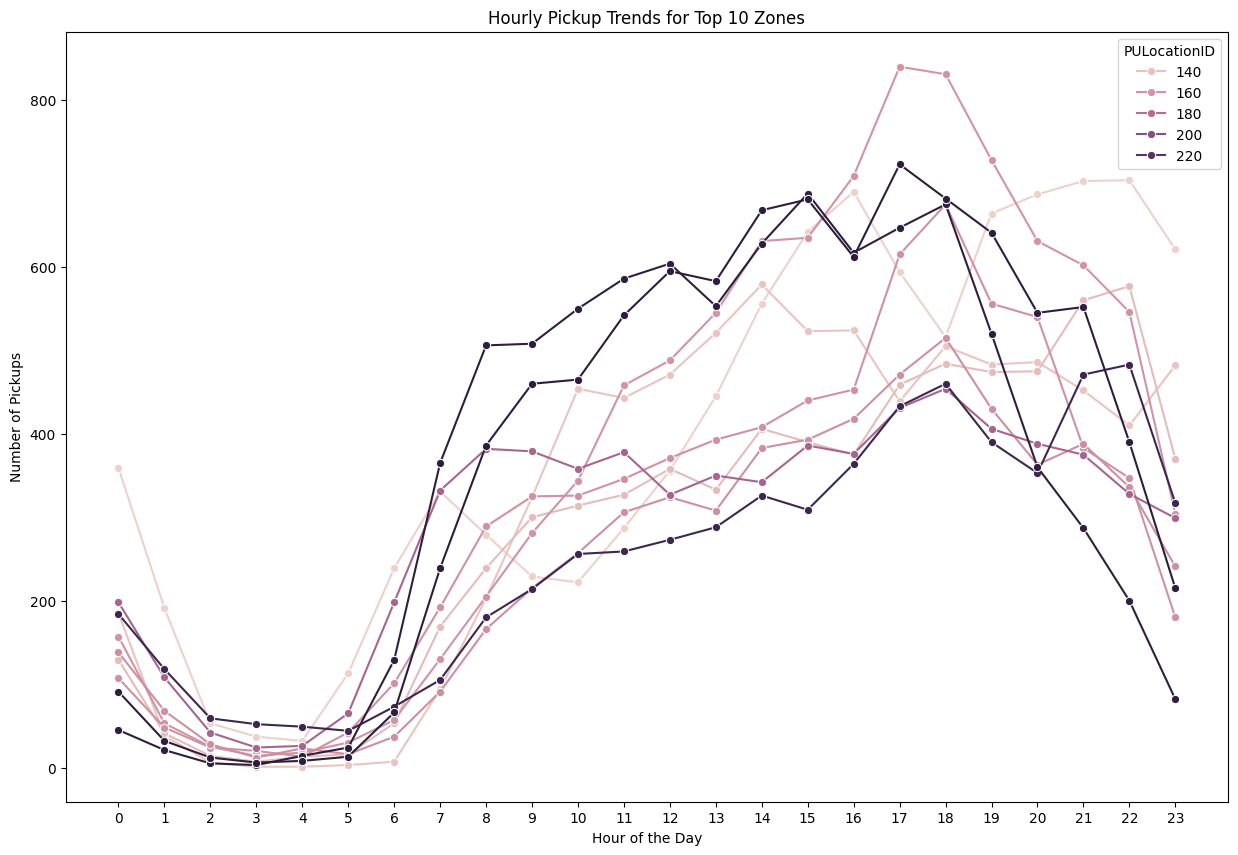

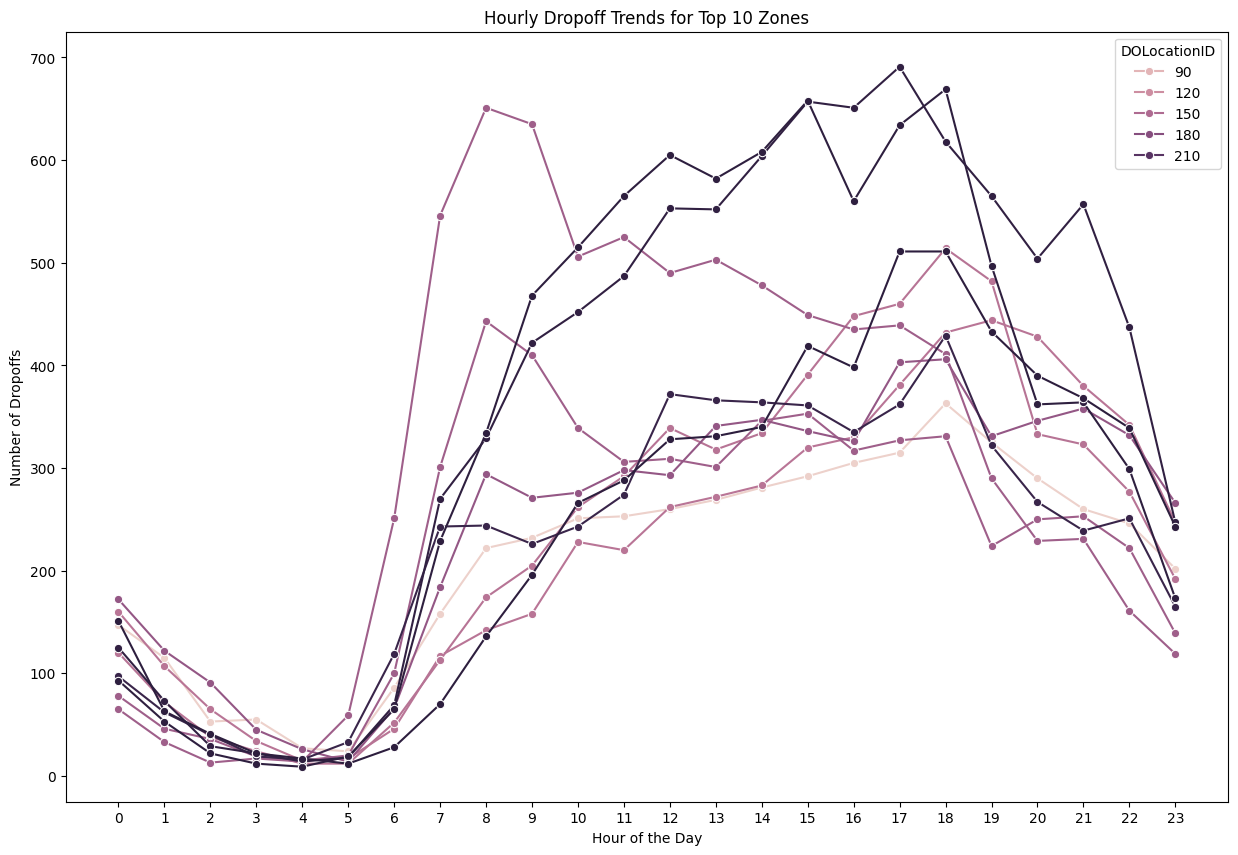

In [82]:
# Find top 10 pickup and dropoff zones

pickup_counts = merged_df.groupby(['PULocationID', 'pickup_time_derived']).size().reset_index(name='pickup_count')
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index
top_pickup_data = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]
plt.figure(figsize=(15, 10))
sns.lineplot(data=top_pickup_data, x='pickup_time_derived', y='pickup_count', hue='PULocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.legend(title='PULocationID')
plt.xticks(range(24))
plt.show()
dropoff_counts = merged_df.groupby(['DOLocationID', 'pickup_time_derived']).size().reset_index(name='dropoff_count')
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index
top_dropoff_data = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]
plt.figure(figsize=(15, 10))
sns.lineplot(data=top_dropoff_data, x='pickup_time_derived', y='dropoff_count', hue='DOLocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.legend(title='DOLocationID')
plt.xticks(range(24))
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [83]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = merged_df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']
dropoff_counts = merged_df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']
pickup_dropoff_counts = pickup_counts.merge(dropoff_counts, on='LocationID', how='outer').fillna(0)
pickup_dropoff_counts['pickup_dropoff_ratio'] = pickup_dropoff_counts['pickup_count'] / pickup_dropoff_counts['dropoff_count']
highest_ratios = pickup_dropoff_counts.nlargest(10, 'pickup_dropoff_ratio')
print("10 Highest Pickup/Dropoff Ratios:")
print(highest_ratios[['LocationID', 'pickup_dropoff_ratio']])
lowest_ratios = pickup_dropoff_counts.nsmallest(10, 'pickup_dropoff_ratio')
print("\n10 Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios[['LocationID', 'pickup_dropoff_ratio']])



10 Highest Pickup/Dropoff Ratios:
     LocationID  pickup_dropoff_ratio
175         184                   inf
67           70             11.912500
123         132              4.755976
129         138              2.874247
195         207              2.000000
203         215              1.909091
177         186              1.700171
40           43              1.415937
236         249              1.378286
106         114              1.348713

10 Lowest Pickup/Dropoff Ratios:
    LocationID  pickup_dropoff_ratio
1            3                   0.0
3            5                   0.0
4            6                   0.0
7            9                   0.0
13          15                   0.0
14          16                   0.0
16          18                   0.0
17          19                   0.0
18          20                   0.0
19          21                   0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [84]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours_df = merged_df[(merged_df['pickup_time_derived'] >= 23) | (merged_df['pickup_time_derived'] <= 5)]
night_pickup_counts = night_hours_df['PULocationID'].value_counts().reset_index()
night_pickup_counts.columns = ['LocationID', 'pickup_count']
night_dropoff_counts = night_hours_df['DOLocationID'].value_counts().reset_index()
night_dropoff_counts.columns = ['LocationID', 'dropoff_count']
top_night_pickup_zones = night_pickup_counts.nlargest(10, 'pickup_count')
top_night_dropoff_zones = night_dropoff_counts.nlargest(10, 'dropoff_count')
print("Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):")
print(top_night_pickup_zones)
print("\nTop 10 Dropoff Zones during Night Hours (11 PM to 5 AM):")
print(top_night_dropoff_zones)

Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):
   LocationID  pickup_count
0          79          1801
1         249          1483
2         132          1406
3          48          1178
4         148          1142
5         114          1040
6         230           823
7         186           762
8         138           716
9         164           694

Top 10 Dropoff Zones during Night Hours (11 PM to 5 AM):
   LocationID  dropoff_count
0          79            914
1         170            736
2         107            702
3          48            698
4         263            649
5         141            645
6          68            623
7         229            561
8         239            549
9         249            529


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

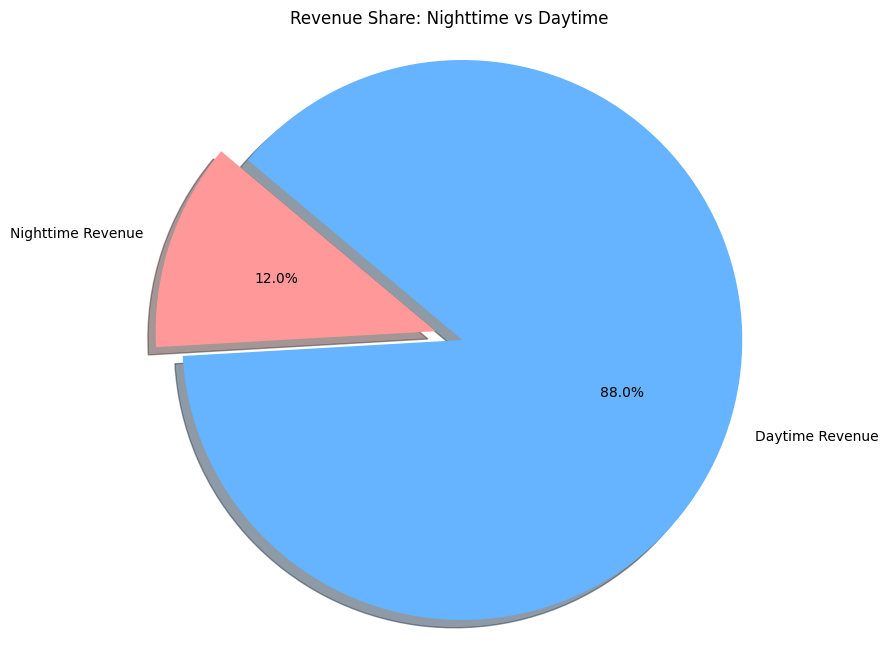

In [85]:
# Filter for night hours (11 PM to 5 AM)

night_hours_df = merged_df[(merged_df['pickup_time_derived'] >= 23) | (merged_df['pickup_time_derived'] <= 5)]
night_revenue = night_hours_df['total_amount'].sum()
day_hours_df = merged_df[(merged_df['pickup_time_derived'] >= 6) & (merged_df['pickup_time_derived'] <= 22)]
day_revenue = day_hours_df['total_amount'].sum()
total_revenue = merged_df['total_amount'].sum()
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100
labels = ['Nighttime Revenue', 'Daytime Revenue']
sizes = [night_revenue_share, day_revenue_share]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Revenue Share: Nighttime vs Daytime')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [86]:
# Analyse the fare per mile per passenger for different passenger counts

merged_df['fare_per_mile_derived'] = merged_df['fare_amount'] / merged_df['trip_distance']
avg_fare_per_mile = merged_df.groupby('passenger_count')['fare_per_mile_derived'].mean().reset_index()
avg_fare_per_mile['fare_per_mile_per_passenger'] = avg_fare_per_mile['fare_per_mile_derived'] / avg_fare_per_mile['passenger_count']
avg_fare_per_mile

passenger_count  fare_per_mile_derived  fare_per_mile_per_passenger
0              0.0               7.457661                          inf
1              1.0               7.320667                     7.320667
2              2.0               7.125266                     3.562633
3              3.0               7.339215                     2.446405
4              4.0               7.339026                     1.834757
5              5.0               7.288955                     1.457791
6              6.0               7.320516                     1.220086

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

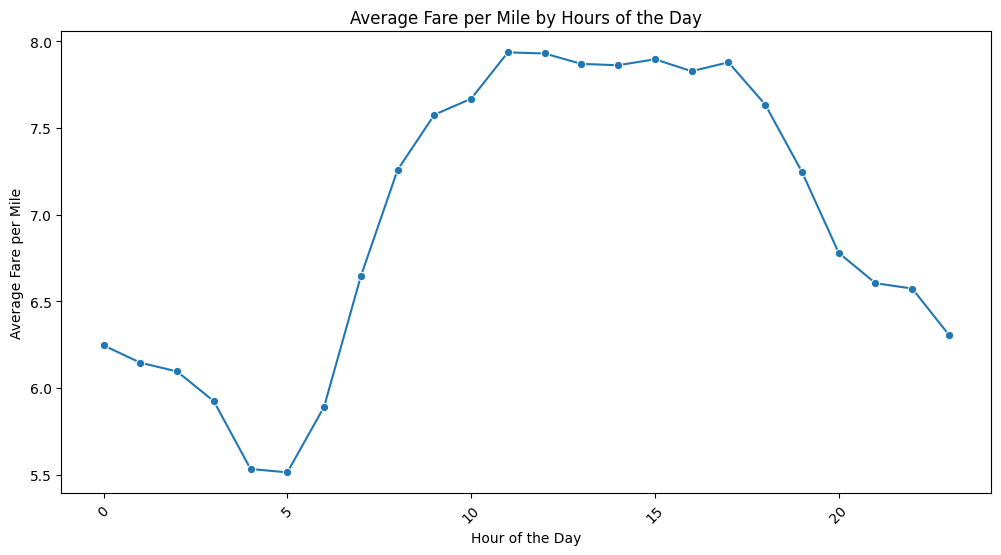

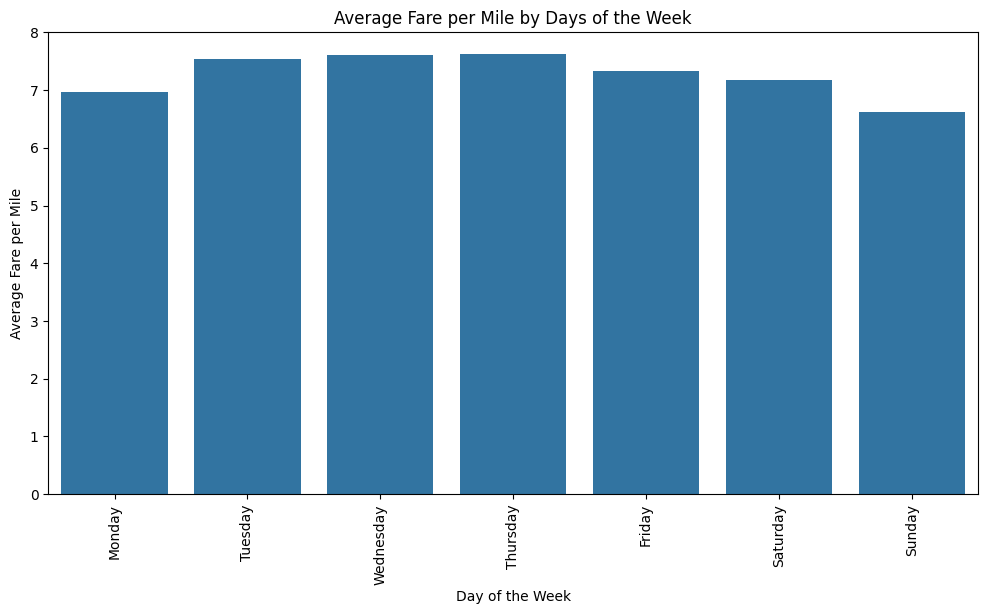

In [87]:
# Compare the average fare per mile for different days and for different times of the day

avg_fare_per_mile_by_hour = merged_df.groupby('pickup_time_derived')['fare_per_mile_derived'].mean().reset_index()
avg_fare_per_mile_by_day = merged_df.groupby('pickup_day_derived')['fare_per_mile_derived'].mean().reset_index()
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
avg_fare_per_mile_by_day['pickup_day_name'] = avg_fare_per_mile_by_day['pickup_day_derived'].map(day_name_map)
render_line_plot(avg_fare_per_mile_by_hour['pickup_time_derived'], avg_fare_per_mile_by_hour['fare_per_mile_derived'], 'Average Fare per Mile by Hours of the Day', 'Hour of the Day', 'Average Fare per Mile')
render_bar_plot(avg_fare_per_mile_by_day['pickup_day_name'], avg_fare_per_mile_by_day['fare_per_mile_derived'], 'Average Fare per Mile by Days of the Week', 'Day of the Week', 'Average Fare per Mile')

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

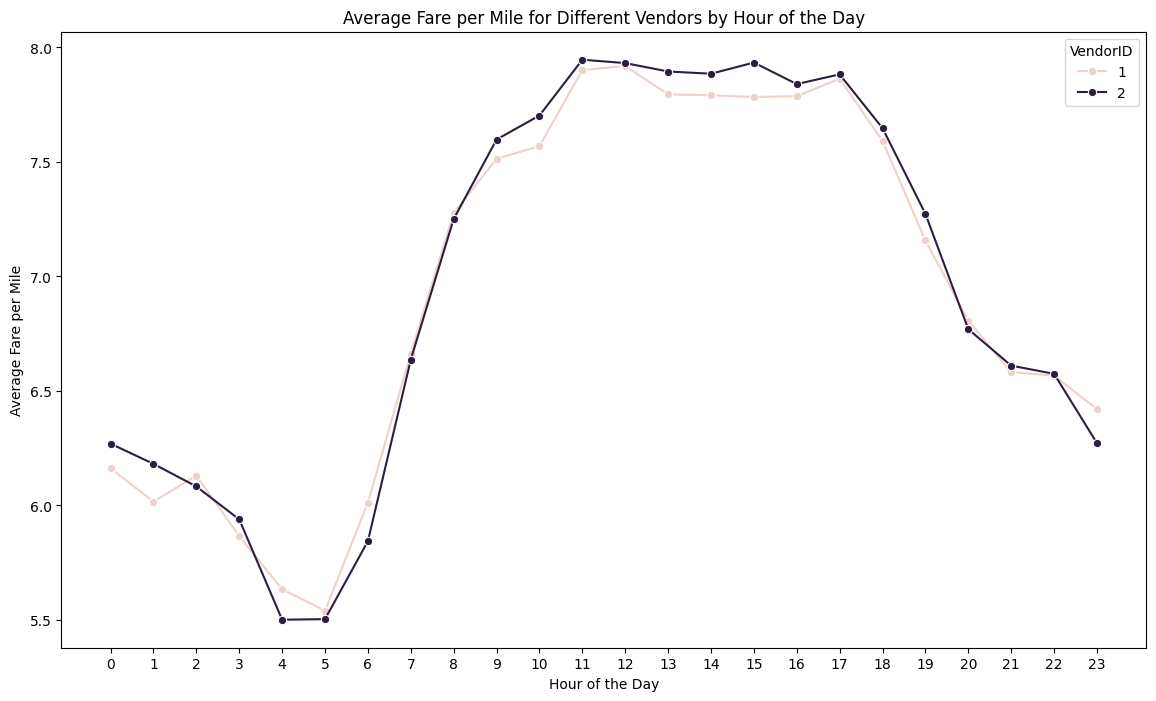

In [88]:
# Compare fare per mile for different vendors

avg_fare_per_mile_by_vendor_hour = merged_df.groupby(['VendorID', 'pickup_time_derived'])['fare_per_mile_derived'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(x='pickup_time_derived', y='fare_per_mile_derived', hue='VendorID', data=avg_fare_per_mile_by_vendor_hour, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile for Different Vendors by Hour of the Day')
plt.xticks(range(24))
plt.legend(title='VendorID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [89]:
# Defining distance tiers

distance_tiers = [
    (0, 2),
    (2, 5),
    (5, float('inf'))
]
results = []
for min_distance, max_distance in distance_tiers:
    tier_df = merged_df[(merged_df['trip_distance'] > min_distance) & (merged_df['trip_distance'] <= max_distance)]
    avg_fare_per_mile = tier_df.groupby('VendorID').apply(lambda x: (x['fare_amount'] / x['trip_distance']).mean()).reset_index()
    avg_fare_per_mile.columns = ['VendorID', 'avg_fare_per_mile']
    avg_fare_per_mile['distance_tier'] = f'{min_distance} - {max_distance} miles'
    results.append(avg_fare_per_mile)
fare_rate_comparison = pd.concat(results, ignore_index=True)
fare_rate_comparison



VendorID  avg_fare_per_mile  distance_tier
0         1           8.595400    0 - 2 miles
1         2           8.739566    0 - 2 miles
2         1           6.377538    2 - 5 miles
3         2           6.543137    2 - 5 miles
4         1           4.473132  5 - inf miles
5         2           4.510080  5 - inf miles

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

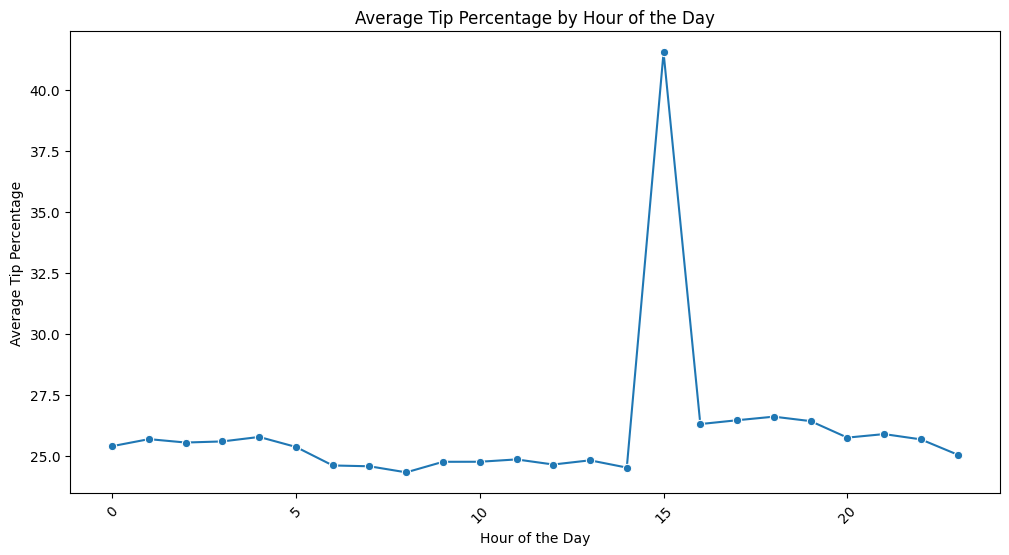

In [93]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

merged_df['tip_percentage_derived'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100
avg_tip_by_distance = merged_df.groupby('trip_distance')['tip_percentage_derived'].mean().reset_index()
avg_tip_by_passenger_count = merged_df.groupby('passenger_count')['tip_percentage_derived'].mean().reset_index()
avg_tip_by_hour = merged_df.groupby('pickup_time_derived')['tip_percentage_derived'].mean().reset_index()
render_line_plot(avg_tip_by_distance['trip_distance'], avg_tip_by_distance['tip_percentage_derived'], 'Average Tip Percentage by Trip Distance', 'Trip Distance (miles)', 'Average Tip Percentage')
render_bar_plot(avg_tip_by_passenger_count['passenger_count'], avg_tip_by_passenger_count['tip_percentage_derived'], 'Average Tip Percentage by Passenger Count', 'Passenger Count', 'Average Tip Percentage')
render_line_plot(avg_tip_by_hour['pickup_time_derived'], avg_tip_by_hour['tip_percentage_derived'], 'Average Tip Percentage by Hour of the Day', 'Hour of the Day', 'Average Tip Percentage')




Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

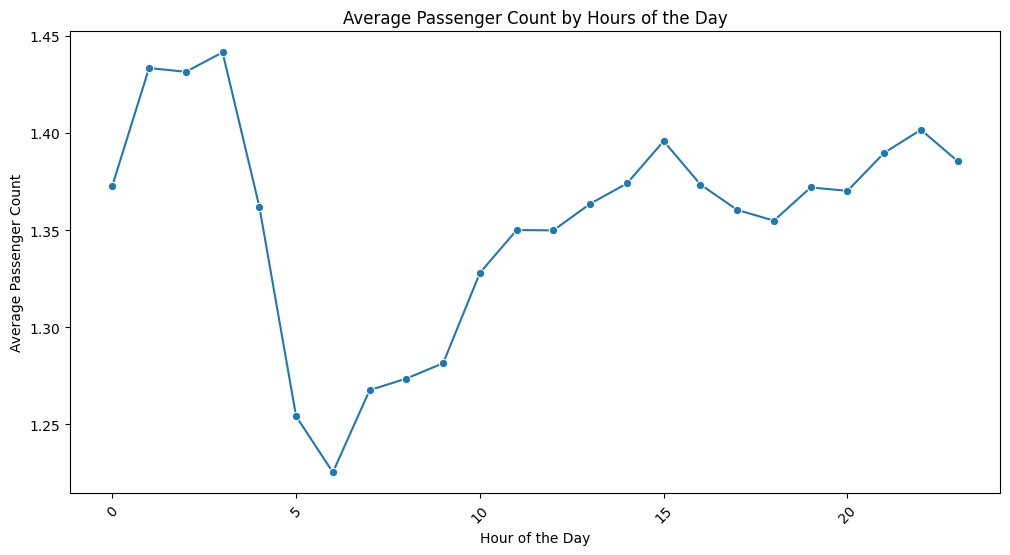

In [94]:
# See how passenger count varies across hours and days

avg_passenger_count_by_hour = merged_df.groupby('pickup_time_derived')['passenger_count'].mean().reset_index()
avg_passenger_count_by_day = merged_df.groupby('pickup_day_name_derived')['passenger_count'].mean().reset_index()
render_line_plot(avg_passenger_count_by_hour['pickup_time_derived'], avg_passenger_count_by_hour['passenger_count'], 'Average Passenger Count by Hours of the Day', 'Hour of the Day', 'Average Passenger Count')
render_bar_plot(avg_passenger_count_by_day['pickup_day_name_derived'], avg_passenger_count_by_day['passenger_count'], 'Average Passenger Count by Day of the Week', 'Day of the Week', 'Average Passenger Count', show_data_labels=True)

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [95]:
# How does passenger count vary across zones
avg_passenger_count_by_zone = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()

In [96]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_passenger_count = zones.merge(avg_passenger_count_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_passenger_count['passenger_count'].fillna(0, inplace=True)
render_line_plot(zones_with_passenger_count.LocationID, zones_with_passenger_count.passenger_count, 'Average Passenger Count by Zone', 'Zone (LocationID)', 'Average Passenger Count', figsize=(20, 10))

In [103]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Calculate the average passenger count for each zone
avg_passenger_count_by_zone = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Merge the average passenger count with the zones_with_trips GeoDataFrame
zones_with_trips = zones_with_trips.merge(avg_passenger_count_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values with 0 (for zones with no trips)
zones_with_trips['passenger_count'].fillna(0, inplace=True)

# Plot the average passenger count for each zone using a Geo Plot
zones_with_trips.plot(column='passenger_count', cmap='Blues', legend=True, legend_kwds={'label': "Average Passenger Count", 'orientation': "horizontal"}, figsize=(12, 12))
plt.title('Average Passenger Count by Zone')
plt.show()



MergeError: Passing 'suffixes' which cause duplicate columns {'passenger_count_x', 'PULocationID_x'} is not allowed.

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [108]:
# How often is each surcharge applied?

surcharge_columns = ['congestion_surcharge', 'improvement_surcharge']
surcharge_frequencies = merged_df[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()
surcharge_frequencies.columns = ['Surcharge', 'Frequency']
print("Frequency of each surcharge:")
print(surcharge_frequencies)

Frequency of each surcharge:
               Surcharge  Frequency
0   congestion_surcharge     187231
1  improvement_surcharge     197577


In [109]:
# Analyze the pickup zones where surcharges are applied more frequently
pickup_surcharge_zones = merged_df[merged_df[surcharge_columns].sum(axis=1) > 0].groupby('PULocationID').size().reset_index(name='surcharge_count')
pickup_surcharge_zones = pickup_surcharge_zones.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left').sort_values(by='surcharge_count', ascending=False)

# Display the top pickup zones with surcharges
print("Top pickup zones with surcharges:")
print(pickup_surcharge_zones.head(10))

Top pickup zones with surcharges:
     PULocationID  surcharge_count  LocationID                          zone
73            132             9550       132.0                   JFK Airport
95            161             9262       161.0                Midtown Center
140           237             9207       237.0         Upper East Side South
139           236             8617       236.0         Upper East Side North
79            138             7634       138.0             LaGuardia Airport
96            162             7194       162.0                  Midtown East
107           186             6952       186.0  Penn Station/Madison Sq West
82            142             6883       142.0           Lincoln Square East
134           230             6060       230.0     Times Sq/Theatre District
97            163             5927       163.0                 Midtown North


In [110]:
# Analyze the dropoff zones where surcharges are applied more frequently
dropoff_surcharge_zones = merged_df[merged_df[surcharge_columns].sum(axis=1) > 0].groupby('DOLocationID').size().reset_index(name='surcharge_count')
dropoff_surcharge_zones = dropoff_surcharge_zones.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left').sort_values(by='surcharge_count', ascending=False)

# Display the top dropoff zones with surcharges
print("Top dropoff zones with surcharges:")
print(dropoff_surcharge_zones.head(10))


Top dropoff zones with surcharges:
     DOLocationID  surcharge_count  LocationID                       zone
224           236             8946       236.0      Upper East Side North
225           237             8395       237.0      Upper East Side South
153           161             7550       161.0             Midtown Center
162           170             5944       170.0                Murray Hill
227           239             5901       239.0      Upper West Side South
134           142             5787       142.0        Lincoln Square East
154           162             5485       162.0               Midtown East
218           230             5449       230.0  Times Sq/Theatre District
133           141             5430       141.0            Lenox Hill West
66             68             5031        68.0               East Chelsea


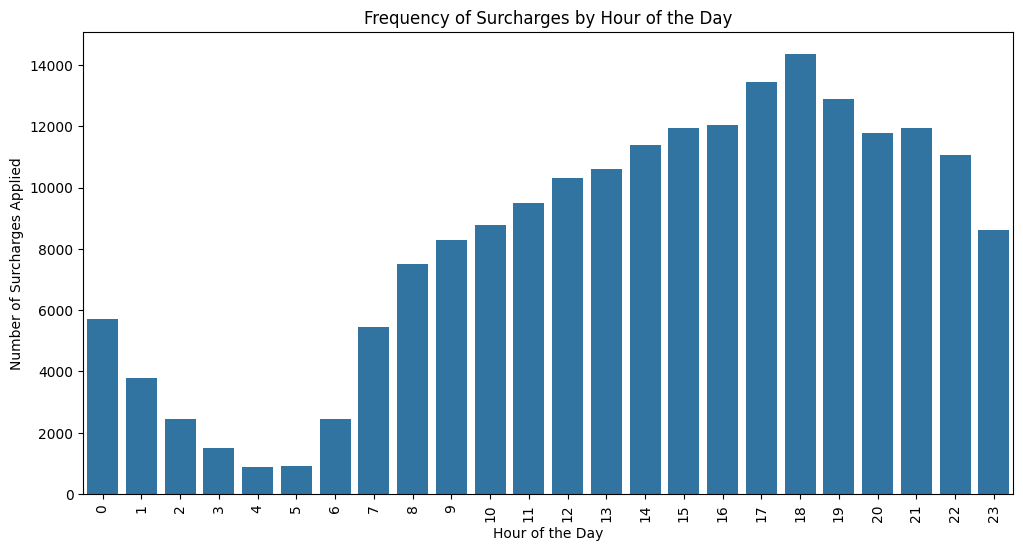

In [111]:
# Analyze the times when surcharges are applied more frequently
merged_df['surcharge_applied_derived'] = merged_df[surcharge_columns].sum(axis=1) > 0
surcharge_by_hour = merged_df.groupby('pickup_time_derived')['surcharge_applied_derived'].sum().reset_index()

# Plot the frequency of surcharges by hour of the day
render_bar_plot(surcharge_by_hour['pickup_time_derived'], surcharge_by_hour['surcharge_applied_derived'], 'Frequency of Surcharges by Hour of the Day', 'Hour of the Day', 'Number of Surcharges Applied')

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

On the basis of analysis of demand trends and operational inefficiencies, it is suggested that the company rationalize its fleet management and pricing policy. During peak daytime periods (6 AM to 10 PM), additional cabs must be assigned to minimize passenger wait times and enhance fleet utilization. Surge pricing must be applied in peak areas like commercial centers or transport hubs to control demand and generate increased fare income. Secondly, prices should be varied by the time of day and day of the week to maximize income without losing competitiveness, as shown by the analysis of average fare per mile. Late at night (11 PM to 5 AM), the fleet must be ramped up in high-demand pickup and drop-off areas so that it will be available when demand is greatest. Repositioning algorithms can also maximize vehicle positioning in high-demand areas during surge times so that vehicles are optimally placed to reduce wait times. These measures will enhance operational efficiency, customer satisfaction, and ultimately company revenue.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

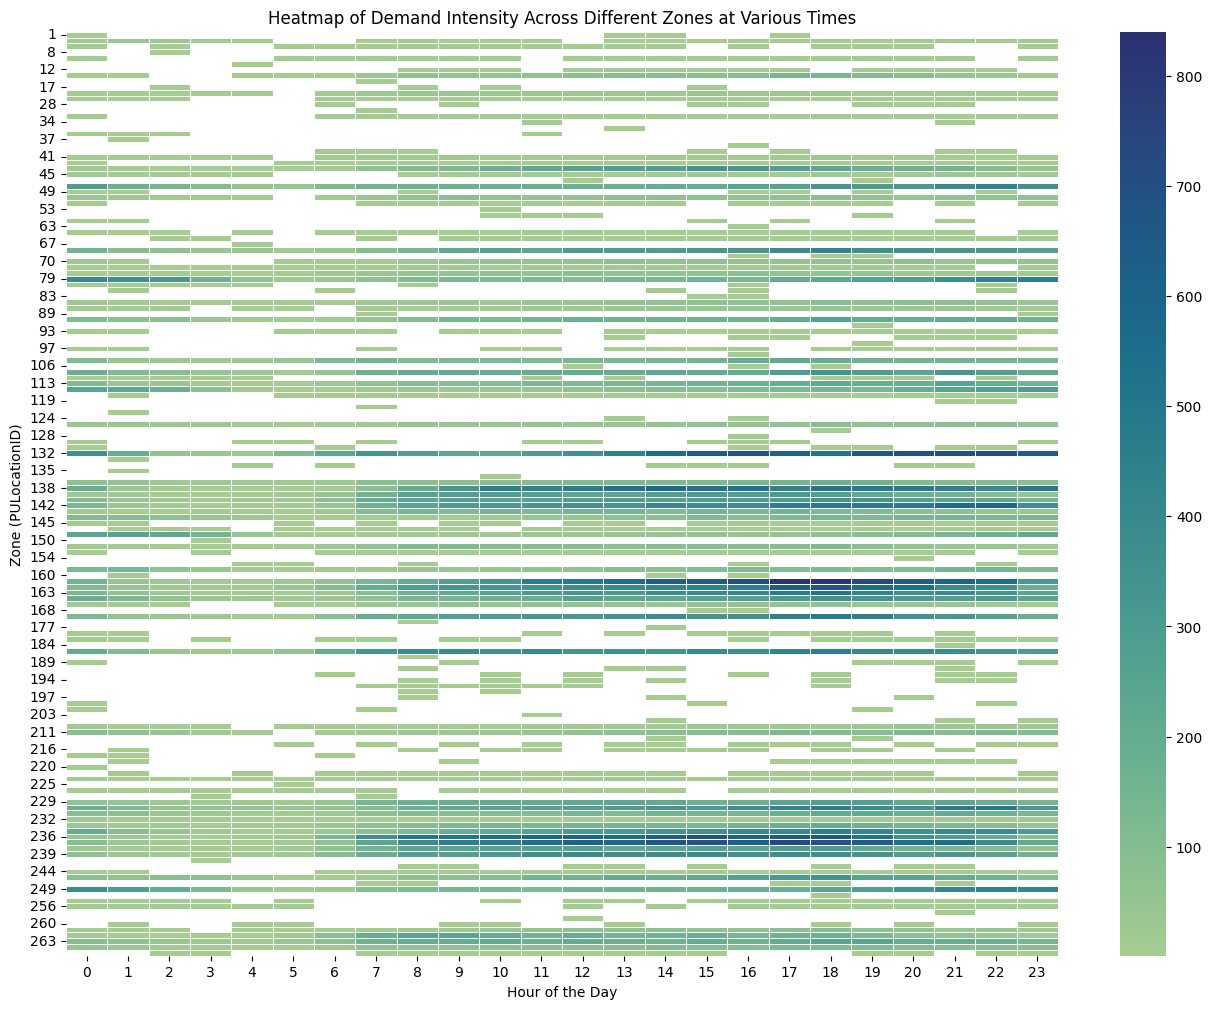

In [112]:
# Aggregate trip counts and passenger counts by zone and time
demand_data = merged_df.groupby(['PULocationID', 'pickup_time_derived']).agg({
    'passenger_count': 'sum',
    'PULocationID': 'count'
}).rename(columns={'PULocationID': 'trip_count'}).reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = demand_data.pivot(index='PULocationID', columns='pickup_time_derived', values='trip_count')

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap="crest", linewidths=0.5)
plt.title('Heatmap of Demand Intensity Across Different Zones at Various Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Zone (PULocationID)')
plt.show()

The interpretation of the heatmap demonstrates distinct patterns in taxi demand between different pickup zones and hours of the day. On the Y-axis, various pickup zones (as indicated by PULocationID) are plotted, while the X-axis indicates hours from 0 to 23, covering the entire range of a day. Intensity of color on the map visually represents volume of demand, where darker blue shades represent higher pickup numbers (usually over 800), and lighter green hues indicate lower levels of demand.

Important observations come from the visualization. High-demand areas like IDs 132, 138, 142, 163, and 236 show uniformly dense taxi activity, particularly during morning rush hours (7–10 AM) and evening hours (4–8 PM). Such areas probably denote transportation hubs, commercial districts, or high-population areas. On the other hand, a large number of areas show light colors, indicating sparse or little taxi usage—perhaps indicating residential areas, less traveled areas, or service-desert areas.

The map also indicates temporal patterns, in which peaks of demand occur in normal commuting hours, demarking persistent behavior patterns. Though there are zones where there is a constant demand through the day, the majority display time-based patterns of use, perhaps echoing office hours, nights out, or public activities.

These findings are not only theoretical—they provide actionable information. Taxi companies can utilize this information to position drivers strategically during the day so that they are covering high-demand locations when they are needed most. Likewise, firms can implement surge pricing during busy times and places. From an urban planning point of view, these heatmaps assist in identifying mobility hotspots and can be used to inform infrastructure and transit planning efforts.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

The company can improve its pricing model using data-driven insights to maximize revenue and stay competitive. Importantly, revenue falls in July to September, reflecting a seasonal dip. Promotional fares or targeted discounts for these months might encourage more riders and enhance overall fleet utilization. Lastly, the low correlation (0.32) between trip length and fare amount implies that long trips aren't adequately priced. Impose waiting time fares in periods of inactivity—i.e., when traffic is stopped—so that fare levels capture trip length more closely.

Passenger-based pricing represents another potential. As it stands, fares today don't capture the number of riders, and therefore, charging a group ride surcharge or providing group bundles for discounted rates could align price with resource usage more effectively. In addition, employing machine learning to forecast demand elasticity by zone, time, and trip distance would enable accurate, dynamic price updates that react to customer sensitivity without damaging ride quantity. Lastly, optimizing distance-based fare calibration from historical ride information can guarantee fairness while maximizing income for both short and long rides.